# Wikipedia Notable Life Expectancies
# [Notebook 11: Linear Regression Model ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_olsmodel_thanak_2022_10_9.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# building regression model
import statsmodels.api as sm

# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# check linear regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# to compare fit between models
from scipy.stats.distributions import chi2

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77341 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77339,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77340,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
9863,16,83.0,0,0,0,0,0,0,1,0,0,0,1,6889.0,0.062500,26,676,Europe,No Prior Region,sports
28931,11,81.0,0,0,0,0,0,1,0,0,0,0,1,6561.0,0.090909,25,625,Europe,No Prior Region,arts
33038,13,78.0,0,0,0,0,0,0,0,0,1,0,1,6084.0,0.076923,3,9,South America,No Prior Region,politics_govt_law
56725,35,70.0,0,0,0,0,0,1,0,0,0,0,1,4900.0,0.028571,15,225,Russian Federation,No Prior Region,arts
47602,4,90.0,0,0,0,0,0,0,0,0,1,0,1,8100.0,0.250000,24,576,North America,No Prior Region,politics_govt_law


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77341 entries, 0 to 77340
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77341 non-null  int64  
 1   age                        77341 non-null  float64
 2   sciences                   77341 non-null  int64  
 3   social                     77341 non-null  int64  
 4   spiritual                  77341 non-null  int64  
 5   academia_humanities        77341 non-null  int64  
 6   business_farming           77341 non-null  int64  
 7   arts                       77341 non-null  int64  
 8   sports                     77341 non-null  int64  
 9   law_enf_military_operator  77341 non-null  int64  
 10  politics_govt_law          77341 non-null  int64  
 11  crime                      77341 non-null  int64  
 12  num_categories             77341 non-null  int64  
 13  age_sqrd                   77341 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77341 entries, 0 to 77340
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77341 non-null  int64   
 1   age                        77341 non-null  float64 
 2   sciences                   77341 non-null  int64   
 3   social                     77341 non-null  int64   
 4   spiritual                  77341 non-null  int64   
 5   academia_humanities        77341 non-null  int64   
 6   business_farming           77341 non-null  int64   
 7   arts                       77341 non-null  int64   
 8   sports                     77341 non-null  int64   
 9   law_enf_military_operator  77341 non-null  int64   
 10  politics_govt_law          77341 non-null  int64   
 11  crime                      77341 non-null  int64   
 12  num_categories             77341 non-null  int64   
 13  age_sqrd                   7734

<IPython.core.display.Javascript object>

## Building a Linear Regression Model

### Data Preparation for Modeling
As there is no model tuning in this ordinary least squares model, we will train directly with the `train` set and check performance directly on the `test` set.  The `test` set needs these treatments first:
1. Drop non-human entries.
1. Drop entries with `event_record_other` as category.
1. Drop entries with age below 18 and over 114.
1. Drop `place_2` values that are duplicates of `place_1`.
1. Add the following columns:  
    a. `age_sqrd`  
    b. `recip_num_references`  
    c. `years`  
    d. `years_sqrd`  
    e. `region`  
    f. `prior_region`    
    g. `known_for`  
1. Typcast categorical predictors.
1. Drop unnecessary columns.
1. Missing value treatment.

We will perform one hot encoding of remaining categorical variables on both `train` and `test` when we define independent and dependent variables, `X` and `y`.

### Test Set

#### Loading [Test Set](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test.csv) and [region_place_dict](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)

In [9]:
# Reading test.csv
test = pd.read_csv("wp_life_expect_test.csv")

# Checking shape
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns in the test set.")

# Loading region_place_dict
with open("region_place_dict.pkl", "rb") as f:
    region_place_dict = pickle.load(f)

There are 19608 rows and 25 columns in the test set.


<IPython.core.display.Javascript object>

In [10]:
# Checking info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19608 entries, 0 to 19607
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        19608 non-null  int64  
 1   name                       19608 non-null  object 
 2   info                       19608 non-null  object 
 3   link                       19608 non-null  object 
 4   num_references             19608 non-null  int64  
 5   year                       19608 non-null  int64  
 6   month                      19608 non-null  object 
 7   info_parenth               6832 non-null   object 
 8   age                        19608 non-null  float64
 9   cause_of_death             6641 non-null   object 
 10  place_1                    19580 non-null  object 
 11  place_2                    1193 non-null   object 
 12  sciences                   19608 non-null  int64  
 13  social                     19608 non-null  int

<IPython.core.display.Javascript object>

#### Pre-processing Steps

In [11]:
%%time

# 1. Dropping non-human entries
rows_to_drop = test[test["other_species"] == 1].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 2. Dropping entries with event_record_other as category
rows_to_drop = test[(test['event_record_other']==1)].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 3. Dropping entries with age < 18 or age > 114
rows_to_drop = test[(test['age']<18) | (test['age']>114)].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 4. Dropping place_2 values that are duplicates of place_1
index = [index for index in test.index if test.loc[index, 'place_2']==test.loc[index, 'place_1']]
test.loc[index, 'place_2']==None

# 5a. Creating age_sqrd column
test['age_sqrd'] = test['age']**2

# 5b. Creating recip_num_references column
test["recip_num_references"] = test["num_references"].apply(lambda x: 1 / x)

# 5c. Creating years column
test['years'] = test['year'] - 1994

# 5d. Creating years_sqrd column
test['years_sqrd'] = test['years']**2

# 5e. Creating region column
# For loop to create region column
test["region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[(test["region"].isna()) & (test["place_2"].notna())].index:
            item = test.loc[index, "place_2"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region
        for index in test[(test["region"].isna()) & (test["place_2"].isna())].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region

# 5f. Creating prior_region column
# For loop to create prior_region column
test["prior_region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[
            (test["place_2"].notna()) & (test["prior_region"].isna())
        ].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "prior_region"] = region
# Adding No Prior Region category
test["prior_region"].fillna("No Prior Region", inplace=True)

# 5g. Creating known_for column
# Initializing known_for
test['known_for']=None
# List of known for columns
cols = ['sciences', 'social', 'spiritual', 'academia_humanities',
       'business_farming', 'arts', 'sports', 'law_enf_military_operator',
       'politics_govt_law', 'crime', 'event_record_other', 'other_species']
# For loop to assign known_for
for index in test[test['known_for'].isna()].index:
    if test.loc[index, 'num_categories']==2:
        test.loc[index, 'known_for'] = 'two'
    elif test.loc[index, 'num_categories'] > 2:
        test.loc[index, 'known_for'] = 'three_to_five'
    else: 
        for column in cols:
            if test.loc[index, column]==1:
                test.loc[index, 'known_for'] = column

# 8. Typecasting categorical predictors
test[['region', 'prior_region', 'known_for']] = test[['region', 'prior_region', 'known_for']].astype('category')

# 9. Dropping Unnecessary Columns
cols_to_drop = [
   'day', 'name', 'info', 'link', 'year', 'month',
       'info_parenth', 'cause_of_death', 'place_1', 'place_2',
       'event_record_other', 'other_species',
]
test.drop(cols_to_drop, axis=1, inplace=True)

# Rechecking columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19364 entries, 0 to 19363
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             19364 non-null  int64   
 1   age                        19364 non-null  float64 
 2   sciences                   19364 non-null  int64   
 3   social                     19364 non-null  int64   
 4   spiritual                  19364 non-null  int64   
 5   academia_humanities        19364 non-null  int64   
 6   business_farming           19364 non-null  int64   
 7   arts                       19364 non-null  int64   
 8   sports                     19364 non-null  int64   
 9   law_enf_military_operator  19364 non-null  int64   
 10  politics_govt_law          19364 non-null  int64   
 11  crime                      19364 non-null  int64   
 12  num_categories             19364 non-null  int64   
 13  age_sqrd                   1936

<IPython.core.display.Javascript object>

In [12]:
# Checking a sample of rows
test.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
171,3,85.0,0,0,0,0,0,1,0,0,0,0,1,7225.0,0.333333,14,196,Asia,No Prior Region,arts
8555,11,89.0,0,0,0,0,0,0,0,1,0,0,1,7921.0,0.090909,15,225,North America,No Prior Region,law_enf_military_operator
198,5,70.0,0,0,0,0,0,0,1,0,0,0,1,4900.0,0.200000,7,49,North America,No Prior Region,sports
13079,9,81.0,0,0,0,0,0,1,0,0,0,0,1,6561.0,0.111111,23,529,Europe,No Prior Region,arts
3847,4,84.0,0,0,0,0,0,0,0,0,1,0,1,7056.0,0.250000,7,49,Asia,No Prior Region,politics_govt_law


<IPython.core.display.Javascript object>

#### Observations:
- Treatment of `test` missing values is the only remaining step.
- We will use the modes for the `known_for` groups from `train` to fill missing values for `test` to avoid data leakage.  `region` is the only column with missing values.

#### Treating Missing Values for `region` in Test

In [13]:
# Checking the starting missing values
print(f'There are {test["region"].isna().sum()} missing values.')

There are 20 missing values.


<IPython.core.display.Javascript object>

In [14]:
# For loop to impute test missing values with mode of train rows with grouped by known_for
for index in test[test["region"].isna()].index:
    group = test.loc[index, "known_for"]
    group_mode = df[df["known_for"] == group]["region"].mode().iloc[0]
    test.loc[index, "region"] = group_mode

# Treating any remaining missing region values with train region column mode
column_mode = df["region"].mode().iloc[0]
test["region"].fillna(column_mode, inplace=True)

#  Checking missing values after treatment
print(f'There are {test["region"].isna().sum()} missing values.')

# Checking region value_counts
test["region"].value_counts()

There are 0 missing values.


North America                 8033
Europe                        6107
Asia                          1634
Oceania                        979
Africa                         676
Middle East                    458
South America                  440
Mid-Cent America/Caribbean     387
Russian Federation             324
South East Asia                307
Central Asia                    19
Name: region, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- `train` and `test` are both ready for modeling.
- We will perform one hot encoding when defining our independent variables.

### Modeling with `age_sqrd`, `years_sqrd`,  `recip_num_references` Transformations
See [Appendix](#Appendix) for model with untreated predictor and target variables, which served as a starting point for testing and addressing assumptions of linear regression.  Mutliple iterations were performed with various transformations of the target and numeric predictors, in various combinations.  Ultimately, the transformations identified in EDA are included in the final model, as they best satisfied the assumptions for linear regression.  To save space, we include only the first and last modeling iterations in this notebook.

#### Defining Independent and Dependent Variables for Train and Test Sets

In [15]:
# Creating list of predictor columns
predictor_cols = [
    "recip_num_references",
    "years_sqrd",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age_sqrd"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77341 rows and 35 columns in X_train.
There are 19364 rows and 35 columns in X_test.



,const,recip_num_references,years_sqrd,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
25854,1.0,0.043478,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24124,1.0,0.200000,529.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [16]:
# Checking a sample of test set
X_test.sample(2)

,const,recip_num_references,years_sqrd,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
5597,1.0,0.333333,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3270,1.0,0.250000,625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [17]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     233.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:12:24   Log-Likelihood:            -7.0061e+05
No. Observations:               77341   AIC:                         1.401e+06
Df Residuals:                   77306   BIC:                         1.402e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Functions to check model performance

In [21]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions then converting to original scale
    pred = model.predict(predictors)
    pred = np.sqrt(pred)

    # converting target back to original scale
    target = np.sqrt(target)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set

In [22]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.093145,11.457386,0.086775,0.086361,19.386723


<IPython.core.display.Javascript object>

### Model Performance on Test Set

In [23]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.95517,11.389402,0.086704,0.08505,19.063186


<IPython.core.display.Javascript object>

### Observations:
- The train and test $R^2$ are both 0.087, indicating that the model explains % of total variation in both sets, so only a small amount, but not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.5 years on the test set.
- MAPE of 19% on the test set means that we are able to predict within ~19% of the reported age, in years.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [24]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [25]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,383.251400
18,prior_region_No Prior Region,16.681552
15,prior_region_Europe,10.111712
8,region_North America,7.827642
24,known_for_arts,7.500182
5,region_Europe,7.116771
32,known_for_sports,5.431625
28,known_for_politics_govt_law,5.008116
34,known_for_two,4.395105
3,region_Asia,3.187820


<IPython.core.display.Javascript object>

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- We will accept the higher VIF value belonging to the constant as the constant is necessary for the residuals to have zero mean, avoiding bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance, then re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- When dropping dummy variables, we will add the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [26]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [27]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.092567,2079.937402
1,prior_region_Europe,0.091911,2080.688809
2,known_for_politics_govt_law,0.091855,2080.752670
3,known_for_arts,0.089055,2083.958067
4,known_for_sports,0.083454,2090.355236
5,region_Europe,0.081624,2092.441368
6,region_North America,0.079903,2094.401093


<IPython.core.display.Javascript object>

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [28]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,67.135730
8,region_North America,7.824767
23,known_for_arts,7.499885
5,region_Europe,7.115775
31,known_for_sports,5.431618
27,known_for_politics_govt_law,5.008108
33,known_for_two,4.395050
3,region_Asia,3.186210
28,known_for_sciences,2.686565
9,region_Oceania,2.312335


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [29]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.091767,2080.854118
1,known_for_arts,0.088960,2084.067290
2,known_for_sports,0.083368,2090.452804
3,region_Europe,0.081510,2092.571308
4,region_North America,0.079767,2094.555452


<IPython.core.display.Javascript object>

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [30]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,38.699416
8,region_North America,7.802053
5,region_Europe,7.085212
3,region_Asia,3.183209
9,region_Oceania,2.310495
23,known_for_arts,1.859248
7,region_Middle East,1.724228
11,region_South America,1.664852
30,known_for_sports,1.632054
6,region_Mid-Cent America/Caribbean,1.551503


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [31]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.080264,2093.989925
1,region_North America,0.078579,2095.907108


<IPython.core.display.Javascript object>

#### Observations:
- That iteration got us down to two remaining high VIF columns.
- Of the remaining high VIF columns, `region_Europe` has the least impact on performance when dropped, so we will drop it.

#### Dropping `region_Europe`

In [32]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,13.971353
22,known_for_arts,1.844130
29,known_for_sports,1.622893
31,known_for_two,1.476318
7,region_North America,1.310188
26,known_for_sciences,1.253058
3,region_Asia,1.156671
25,known_for_law_enf_military_operator,1.136943
8,region_Oceania,1.094044
28,known_for_spiritual,1.092228


<IPython.core.display.Javascript object>

#### Observations:
- `prior_region_No Prior Region`, `known_for_politics_govt_law`, and `region_Europe` columns were dropped and there are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Europe
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [33]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     218.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:26:41   Log-Likelihood:            -7.0114e+05
No. Observations:               77341   AIC:                         1.402e+06
Df Residuals:                   77309   BIC:                         1.403e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [34]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['prior_region_South America', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_Central Asia', 'known_for_social', 'prior_region_Oceania', 'prior_region_North America', 'prior_region_Asia', 'region_Oceania']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [35]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa, Europe, OR Oceania
    - `prior_region`: Africa, No Prior Region, South America, Mid-Cent America/Caribbean, Central Asia, Oceania, North America, OR Asia
    - `known_for`: academia_humanities, politics_govt_law, OR social

#### Fitting Third Model

In [36]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     294.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:26:59   Log-Likelihood:            -7.0114e+05
No. Observations:               77341   AIC:                         1.402e+06
Df Residuals:                   77317   BIC:                         1.403e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- Adjusted $R^2$ has held at 0.081 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 23 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [51]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = np.sqrt(y_train)  # actual values
df_pred["Fitted Values"] = np.sqrt(olsmodel3.fittedvalues)  # predicted values
df_pred["Residuals"] = df_pred["Actual Values"] - df_pred["Fitted Values"]  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,73.0,81.957090,-8.957090
1,90.0,82.481022,7.518978
2,77.0,72.635593,4.364407
3,84.0,75.720194,8.279806
4,64.0,72.742705,-8.742705


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

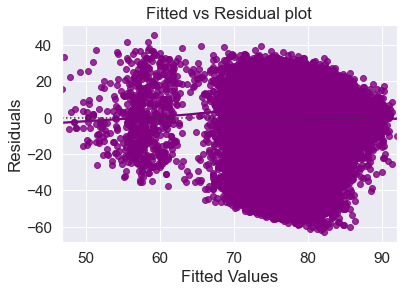

<IPython.core.display.Javascript object>

In [52]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is an underrepresented age group from ~58 to ~63 years in the predictions, resulting in two groups which is interesting.
- Within itself, the under 60 group shows no obvious pattern.
- The group above 60 is heavy on the bottom, indicating larger underestimates for age here, and wider variance.
- **Overall, there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to permit interpretation of coefficients.**
- We will be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Test for Normality

#### Histogram

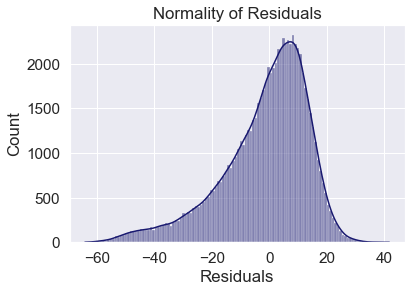

<IPython.core.display.Javascript object>

In [53]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

In [ ]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The distribution of the residuals does have an overall bell shape, but is quite peaked at ~8, with a thicker tail on the negative end.
- As we saw during EDA, there are possibly two Guassian's here.
- The Q-Q plot and the histogram show that the distribution is left-skewed.
- **We cannot strictly say that the assumption of normally distributed residuals is met.**
- Our plan is to apply other modeling algorithms, so we will see how they compare.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [ ]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- **Not all of the assumptions of linear regression are strictly met.  However, we will accept them as sufficiently met to allow for guarded interpretation of coefficients.**

## Final Model Summary

### *olsmodel3* summary

In [ ]:
print(olsmodel3.summary())

#### Final Model Performance on Train Set

In [ ]:
# Checking final model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel3, X_train, y_train)
olsmodel_train_perf

#### Final Model Performance on Validation Set

In [ ]:
# Checking final model performance on test set
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel3, X_test, y_test)
olsmodel_test_perf

#### Observations:
- With $R^2$ of only 0.082 on the train set, our model is underfitting.  The predictors are only able to explain ~8% of the variation from the mean actual age.
- Test $R^2$ of 0.079 indicates that the model is not overfitting, as it compares to that of the test set along with other measures.
- MAE of 11.7 suggests that the model can predict within a mean error of 11.7 years on the test data.
- MAPE of 19.3 on the test data means that we aree able to predict within ~19.3% of age.

## Interpreting *olsmodel3* Parameters

In [ ]:
# For loop to make list of parameters with p-values < 0.05
# Final model predictors
final_pred = X_train

# initial list of all independent variable columns excluding constant
cols = final_pred.columns[1:]

# initial list of columns to interpret
features_to_interp = []

# for loop to create list of features with p < 0.05
for feature in cols:
    p_value = olsmodel3.pvalues[feature]
    if p_value < 0.05:
        features_to_interp.append(feature)

print(
    "Features with interpretable coefficient confidence intervals: \n\n", feat_to_interp
)

#### Interpreting Final Features Coefficients (p-values < 0.05)

In [ ]:
# creating a dataframe of features, coefficients, and interpretations
interp_df = pd.DataFrame(olsmodel3.params).loc[features_to_interp, :].reset_index()
interp_df.rename({"index": "Feature", 0: "Coefficient"}, axis=1, inplace=True)

# title for interpretation column
title = "Impact on Age (all else constant; compared to reference levels for category)"

# for loop to indicate how used price % changes in relation to feature dependent on feature type/transformation
for i, feature in enumerate(interp_df["Feature"]):

    # for mutliplicative inverse transformed features based on 10-fold factor change in feature
    if feature.startswith("recip"):
        interp_df.loc[
            i, title
        ] = f"geometric decrease (*{round(((interp_df.loc[i, 'Coefficient'])*.01), 2)}) with each 10-fold increase in {feature.removeprefix('recip_')}"

    # for categorical one hot encoded
    elif feature.startswith('region'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"
        
    # for categorical one hot encoded
    elif feature.startswith('prior_region'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"

    # for categorical one hot encoded
    elif feature.startswith('known_for'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"
    # for numeric not transformed
    else:
        interp_df.loc[
            i, title
        ] = f"{np.round(interp_df.loc[i, 'Coefficient']*10, 2)} year change with 10 unit change in {feature}"

pd.set_option("max_colwidth", 100)
interp_df


#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean.db]()

In [ ]:
# # Exporting dataframe

# # Saving dataset in a SQLite database
# conn = sql.connect("wp_life_expect_clean.db")
# df.to_sql("wp_life_expect_clean", conn, index=False)

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()

<a id='Appendix'></a>

# Appendix:  Model with Original Predictors and Target

#### Defining Independent and Dependent Variables for Train and Test Sets

In [ ]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

In [ ]:
# Checking a sample of test set
X_test.sample(2)

In [ ]:
# Fitting a linear model and displaying model summary
olsmodel_first = sm.OLS(y_train, X_train).fit()
print(olsmodel_first.summary())

### Model Performance Check

#### Functions to check model performance

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### Model Performance on Train Set

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel_first, X_train, y_train)
olsmodel_train_perf

### Model Performance on Test Set

In [ ]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel_first, X_test, y_test)
olsmodel_test_perf

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [ ]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

#### VIF

In [ ]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Function to Treat Multicollinearity

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

#### Checking Impact of Dropping Columns on Model Performance

In [ ]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

#### Dropping `prior_region_No Prior Region`

In [ ]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Checking Impact of Dropping Columns on Model Performance

In [ ]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

#### Dropping `known_for_politics_govt_law`

In [ ]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Checking Impact of Dropping Columns on Model Performance

In [ ]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

#### Dropping `region_Europe`

In [ ]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Fitting Second Model

In [ ]:
# Fitting a linear model and displaying model summary
olsmodel_first2 = sm.OLS(y_train, X_train).fit()
print(olsmodel_first2.summary())

#### Checking Features with High Coefficient p-values

In [ ]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

#### Dropping `excluded_features` with High p-values

In [ ]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

#### Fitting Third Model

In [ ]:
# fitting third model and printing summary
olsmodel_first3 = sm.OLS(y_train, X_train).fit()
print(olsmodel_first3.summary())

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [ ]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.sample(5)

#### Plot of Fitted Values vs Residuals

In [ ]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Test for Normality

#### Histogram

In [ ]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

In [ ]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [ ]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)